In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras import layers
import keras

In [11]:
data = r"animals10\raw-img"
class_names = sorted(os.listdir(data))
class_names
for name in class_names:
    print(name,len(os.listdir(data+ "/" +name)))

butterfly 2112
cat 1668
chicken 3098
cow 1866
dog 4863
elephant 1446
horse 2623
sheep 1820
spider 4821
squirrel 1862


In [14]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.2,
                              
                              )

In [15]:
train_data = generator.flow_from_directory( data,
                                            batch_size=32, 
                                            target_size=(224, 224), 
                                            class_mode="categorical", 
                                            shuffle=True, 
                                            subset='training',
                                            seed=42)

test_data = generator.flow_from_directory( data,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="categorical",
                                           shuffle=False,
                                           subset='validation',
                                           seed=42)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [1]:
import tensorflow as tf

# Set the GPU memory growth option
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [3]:
import tensorflow as tf 
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())


2.12.0
1:  []
2:  <function is_built_with_cuda at 0x000001E5CB6DF9D0>
3:  
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [13]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2
from tensorflow.keras.applications import InceptionV3, InceptionResNetV2, MobileNet, MobileNetV2, DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import NASNetMobile, NASNetLarge, Xception, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


base_model = VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = True

# Fine-tuning
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Build the model
last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512, 'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Print model summary
model.summary()

80134624/80134624 [==============================] - 9s 0us/step
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [14]:
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)
model_test = history.model
model_test.save('VGG19_transfer_learning_animals10.h5')

# Epoch 10/10
# 655/655 [==============================] - 1351s 2s/step - loss: 0.2856 - accuracy: 0.9089 - val_loss: 0.3685 - val_accuracy: 0.8878

Epoch 1/10
655/655 [==============================] - 1152s 2s/step - loss: 1.4483 - accuracy: 0.4877 - val_loss: 0.9441 - val_accuracy: 0.6894
Epoch 2/10
655/655 [==============================] - 1176s 2s/step - loss: 0.8453 - accuracy: 0.7146 - val_loss: 0.7888 - val_accuracy: 0.7506
Epoch 3/10
655/655 [==============================] - 1141s 2s/step - loss: 0.6497 - accuracy: 0.7865 - val_loss: 0.5642 - val_accuracy: 0.8159
Epoch 4/10
655/655 [==============================] - 1046s 2s/step - loss: 0.5405 - accuracy: 0.8247 - val_loss: 0.4619 - val_accuracy: 0.8567
Epoch 5/10
655/655 [==============================] - 1049s 2s/step - loss: 0.4564 - accuracy: 0.8518 - val_loss: 0.5392 - val_accuracy: 0.8349
Epoch 6/10
655/655 [==============================] - 1159s 2s/step - loss: 0.4022 - accuracy: 0.8682 - val_loss: 0.5272 - val_accuracy: 0.8314
Epoch 7/10
655/655 [==============================] - 1353s 2s/step - loss: 0.3658 - accuracy: 0.8819 - val_loss: 0.4475 - val_accuracy:

In [4]:
import keras
loaded_model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

In [6]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(loaded_model, to_file='VGG19_transfer_learning_animals10_model_visual.png',legend=True,font=font).show() # write and show


ModuleNotFoundError: No module named 'visualkeras'

In [27]:
loaded_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Step 200


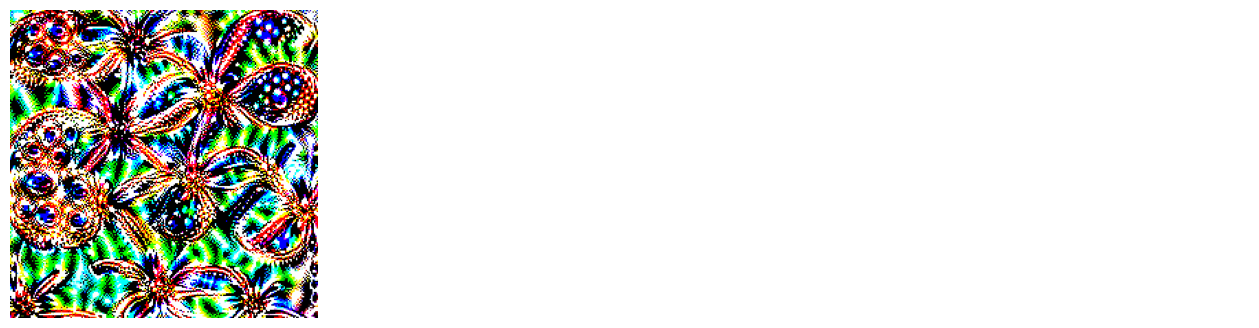

In [26]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.Channel(loaded_model, 'block5_conv3',500)
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

Step 200


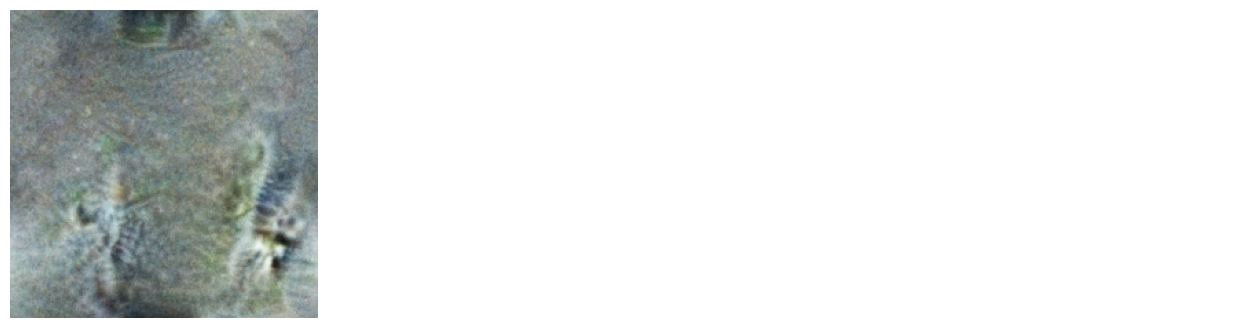

In [31]:
obj = objectives.GramCosSim(loaded_model, 'block5_conv4')
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

Step 200


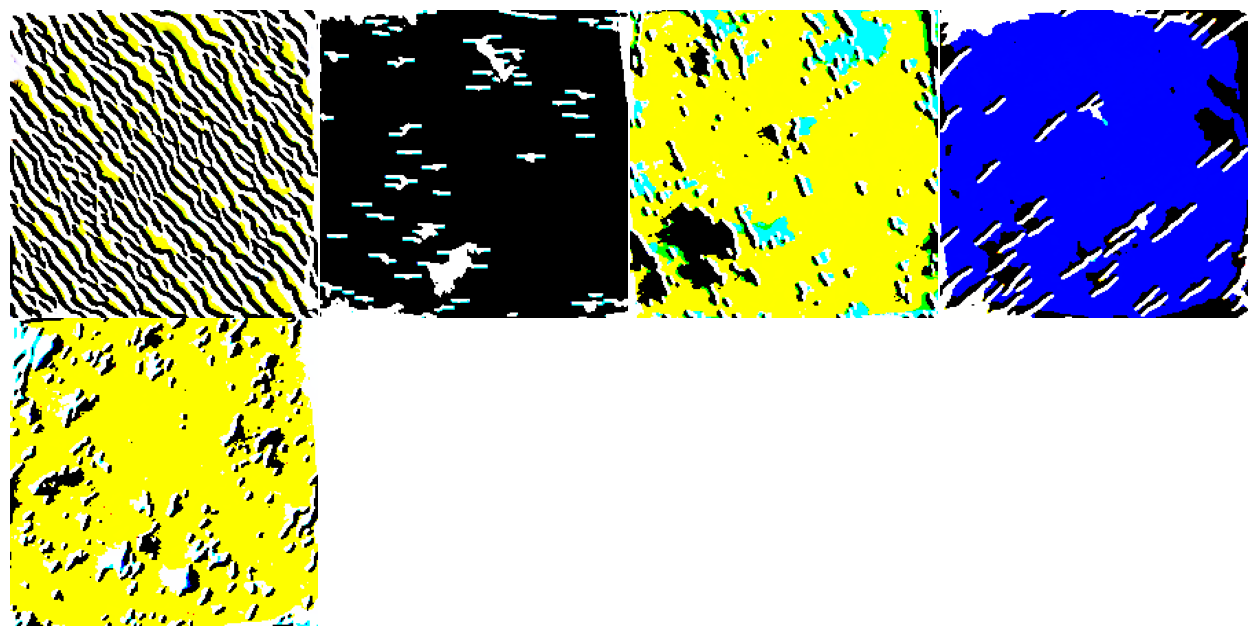

In [24]:
obj = objectives.Channels(loaded_model, 'block1_conv1',[42,43,44,21,55])
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

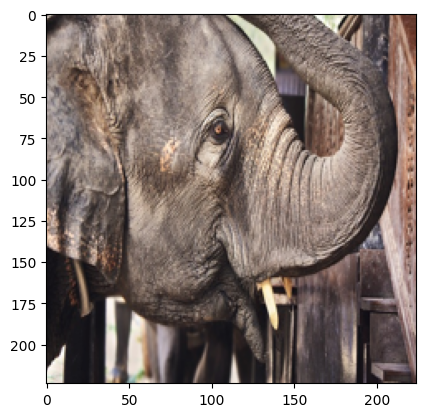

In [15]:
from PIL import Image
import numpy as np
# animals10\raw-img\cat\1440.jpeg
# animals10\raw-img\cat\145.jpeg
# animals10\raw-img\cat\1473.jpeg
# animals10\raw-img\chicken\10.jpeg
# animals10\raw-img\chicken\1001.jpeg
# animals10\raw-img\chicken\1020.jpeg
# animals10\raw-img\chicken\1030.jpeg
# Load and resize the image
image = Image.open(r'animals102\raw_img\elephant\e83db50920f4013ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg')
image = image.resize((224, 224))
if image.mode == 'RGBA':
    image = image.convert('RGB')
plt.imshow(image)
# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the pixel values
image_array = image_array / 255.0

# Expand dimensions to match the model input shape
input_image = np.expand_dims(image_array, axis=0)

    # # Open and resize the image
    # image = Image.open(image_path)
    # image = image.resize((224, 224))
    # if image.mode == 'RGBA':
    #     image = image.convert('RGB')
    
    # # Convert the image to a numpy array
    # image_array = np.array(image)

    # # Normalize the pixel values
    # image_array = image_array / 255.0

    # # Expand dimensions to match the model input shape
    # input_image = np.expand_dims(image_array, axis=0)


In [49]:
classes_dictionary=train_data.class_indices

In [15]:
import csv

def save_dict_as_csv(dictionary, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Key', 'Value', 'Data Type'])  # Write header row
        for key, value in dictionary.items():
            data_type = type(value).__name__  # Get data type of the value
            writer.writerow([key, value, data_type])
    print(f"The dictionary has been saved as {filename}.")
    
save_dict_as_csv(classes_dictionary, 'classes_dictionary.csv')

The dictionary has been saved as classes_dictionary.csv.


In [16]:
# Make the prediction
prediction = loaded_model.predict(input_image)
classes_dictionary=train_data.class_indices
# Get the predicted class label
predicted_class = np.argmax(prediction)
print(predicted_class)
animal_name = get_keys_by_value(classes_dictionary, predicted_class)
# Print the predicted class label
print("Predicted class:", animal_name)


1/1 [==============================] - 0s 63ms/step
5
Predicted class: ['elephant']


In [31]:
def get_keys_by_value(dictionary, value):
    return [key for key, val in dictionary.items() if val == value]



In [19]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
# Function to get keys from dictionary based on value
def get_keys_by_value(dictionary, value):
    return [key for key, val in dictionary.items() if val == value]

# Function to preprocess and predict an image
def preprocess_and_predict(image_path, model, classes_dictionary):
    # Open and resize the image
    image = Image.open(image_path)
    image = image.resize((224, 224))
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the pixel values
    image_array = image_array / 255.0

    # Expand dimensions to match the model input shape
    input_image = np.expand_dims(image_array, axis=0)

    # Make the prediction
    prediction = model.predict(input_image)

    # Get the predicted class label
    predicted_class = np.argmax(prediction)
    animal_name = get_keys_by_value(classes_dictionary, predicted_class)

    return predicted_class, animal_name

# Function to compare prediction with subfolder name and write mismatched paths to a file
def compare_prediction_with_subfolder(image_path, predicted_class, subfolder_name, output_file):
    
    trimmed_animal_name = str(predicted_class[0]).strip("[]")
    with open(output_file, 'a') as f:
        f.write(image_path +', '+trimmed_animal_name +'\n')

# Define the root folder path
root_folder = r'animals10\raw-img'

# Load the model and classes dictionary
loaded_model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')
classes_dictionary = train_data.class_indices

# Define the output file path
output_file = 'missclassified_images.txt'




In [18]:
complete=[False,False,False,False,False,False,False,False,False,False]
but=[0,1,1,1,1,0,1,1,1,1]
cat=[0,0,1,1,1,1,0,1,1,1]
chi=[0,1,0,1,1,0,1,1,1,1]
cow=[0,0,0,0,1,0,1,1,0,0]
dog=[1,1,1,1,0,1,1,1,0,0]
ele=[0,1,0,1,1,0,1,1,0,1]
hor=[0,1,1,1,1,1,0,1,0,0]
she=[0,1,1,1,1,0,1,0,1,0]
spi=[1,1,1,1,1,1,1,1,0,1]
squ=[0,1,1,1,1,1,1,1,1,0]


In [20]:
# Loop over all images in subfolders
from tensorflow.python.framework.errors_impl import InvalidArgumentError

for root, dirs, files in os.walk(root_folder):
    print(root,dirs,files)
    for file in files:
        # Get the image path
        image_path = os.path.join(root, file)

        # Get the subfolder name
        subfolder_name = os.path.basename(os.path.dirname(image_path))

        try:
            predicted_class, animal_name = preprocess_and_predict(image_path, loaded_model, classes_dictionary)
            compare_prediction_with_subfolder(image_path, animal_name, subfolder_name, output_file)
        except InvalidArgumentError as e:
            print(f"Error: InvalidArgumentError occurred for image: {image_path}. Continuing with the next image.")
            continue

animals10\raw-img ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel'] []
animals10\raw-img\butterfly [] ['e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b2092be90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b2092ce90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b2092de90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e030b20a20e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg', 'e132b60e2af51c22d2524518b7444f92e37fe5d404b0144390f8c770a3e5b7_640.jpg', 'e134b50a2efc1c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg', 'e830b30a20f5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.png', 'e830b30a20f6033ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png', 'e830b30a20f6053ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png', 'e831b00c2ef3093ed1584d05fb1d4e9fe777ead2

KeyboardInterrupt: 

In [21]:
file_path = "missclassified_images.txt"

# Read the file
with open(file_path, "r") as file:
    lines = file.readlines()

# Replace the path in each line
new_lines = [line.replace("animals102\\", "animals10/") for line in lines]

# Write the updated lines back to the file
with open(file_path, "w") as file:
    file.writelines(new_lines)


Step 200


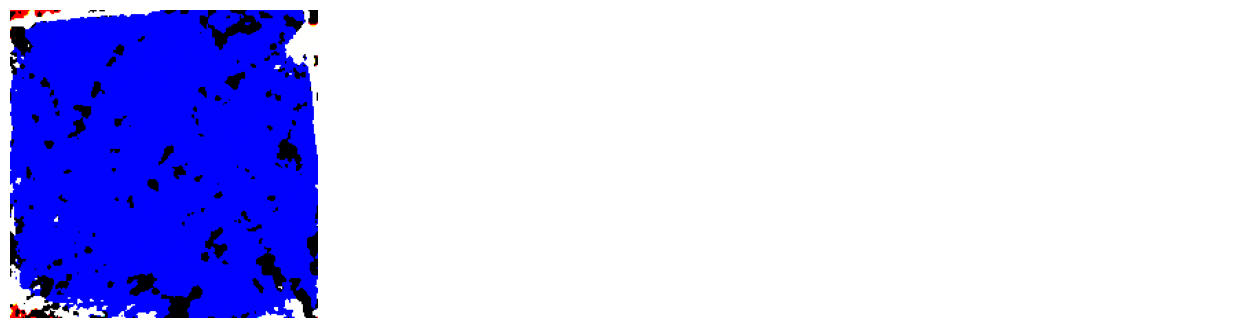

In [38]:
obj = objectives.Channel(model, 'conv1_conv', 3)
_ = render.render_vis(obj, 224)

In [3]:
loaded_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [21]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
def calculate_max_10_channel_activation(layer_name, image_path):
    # Load the trained CNN model
    model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

    # Get the intermediate layer output
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    # Load and preprocess your input image
    # Load your input image and preprocess it if necessary
    image = Image.open(image_path)
    image = image.resize((224, 224))
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    plt.imshow(image)
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the pixel values
    image_array = image_array / 255.0

    # Expand dimensions to match the model input shape
    input_image = np.expand_dims(image_array, axis=0)
    # Generate predictions and get activations of the intermediate layer
    activations = intermediate_layer_model.predict(input_image)

    # Analyze the activations
    channel_activations = tf.reduce_mean(activations, axis=(0, 1, 2))  # Compute the mean activation value for each channel

    # Determine the channels with highest activations
    top_channels_indices = tf.argsort(channel_activations, direction='DESCENDING')
    top_channels_indices = top_channels_indices.numpy()  # Convert to a NumPy array
    top_channels_activations = tf.gather(channel_activations, top_channels_indices)

    # Print the top 10 channels with their corresponding activations
    for i in range(10):
        channel_index = top_channels_indices[i]
        activation_value = top_channels_activations[i]
        print(f"Channel {channel_index}: Activation value {activation_value}")


1/1 [==============================] - 0s 268ms/step
Channel 45: Activation value 6.409417629241943
Channel 54: Activation value 3.370349407196045
Channel 18: Activation value 2.9709482192993164
Channel 11: Activation value 2.577587604522705
Channel 60: Activation value 2.534646987915039
Channel 39: Activation value 2.335329055786133
Channel 4: Activation value 2.3050293922424316
Channel 25: Activation value 2.103975296020508
Channel 15: Activation value 1.9596962928771973
Channel 49: Activation value 1.8913965225219727


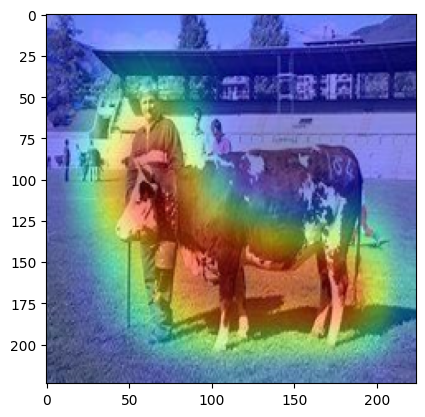

In [40]:
calculate_max_10_channel_activation('block1_conv2' ,r'10missclassified\cow\OIP-B5J76i9gLj-ezh3bsIoGMgHaE7.jpeg')

In [56]:
layer_names = ['block1_conv1','block1_conv2','block2_conv1','block2_conv2','block3_conv1','block3_conv2' ,'block3_conv3','block3_conv4','block4_conv1','block4_conv2' ,'block4_conv3','block4_conv4','block5_conv1','block5_conv2' ,'block5_conv3','block5_conv4' ]

import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras

    # Load the trained CNN model
    model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

 

def calculate_max_channels_activation(image):


    # Load and preprocess your input image
    input_image = image
    image = Image.open(input_image)
    image = image.resize((224, 224))
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    plt.imshow(image)
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the pixel values
    image_array = image_array / 255.0

    # Expand dimensions to match the model input shape
    input_image = np.expand_dims(image_array, axis=0)

    # Get the intermediate layer output, Generate predictions and get activations of the intermediate layer,  # Analyze the activations
    for i in layer_names:
        intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(i).output)
        activations =intermediate_layer_model.predict(input_image)
        channel_activations = tf.reduce_mean(activations, axis=(0, 1, 2))  # Compute the mean activation value for each channel
        # Determine the channels with highest activations
        top_channel_index = tf.argmax(channel_activations)
        top_channel_index = top_channel_index.numpy()  # Convert to a NumPy array
        top_channel_activation = tf.gather(channel_activations, top_channel_index)

        # Print the layers with their corresponding activations
        print(f"Layer {i}: Top channel {top_channel_index} Activation value {top_channel_activation}")

1/1 [==============================] - 4s 4s/step
Layer block1_conv1: Top channel 31 Activation value 3.3844170570373535
1/1 [==============================] - 5s 5s/step
Layer block1_conv2: Top channel 4 Activation value 6.4310221672058105
1/1 [==============================] - 4s 4s/step
Layer block2_conv1: Top channel 113 Activation value 4.256799697875977
1/1 [==============================] - 5s 5s/step
Layer block2_conv2: Top channel 65 Activation value 2.0565316677093506
1/1 [==============================] - 5s 5s/step
Layer block3_conv1: Top channel 220 Activation value 4.19834566116333
1/1 [==============================] - 5s 5s/step
Layer block3_conv2: Top channel 250 Activation value 2.0313339233398438
1/1 [==============================] - 5s 5s/step
Layer block3_conv3: Top channel 203 Activation value 4.629034519195557
1/1 [==============================] - 5s 5s/step
Layer block3_conv4: Top channel 63 Activation value 6.405696868896484
1/1 [=============================

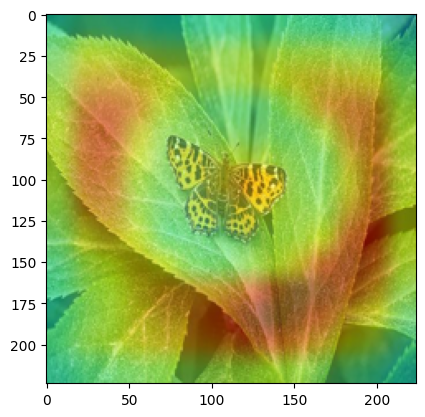

In [57]:
calculate_max_channels_activation(r'10missclassified\butterfly\ea36b7072ef5003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg')

Step 200


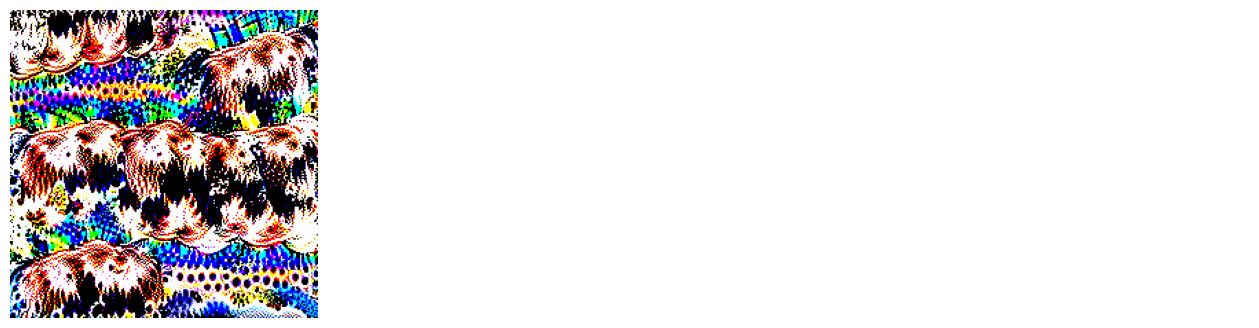

In [13]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render
loaded_model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

obj = objectives.Channel(loaded_model, 'block5_conv4',315)
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

Step 200


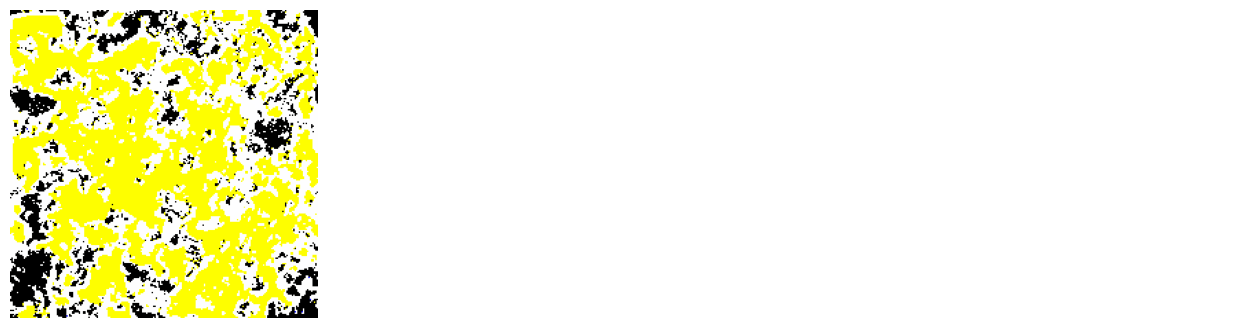

In [31]:
obj = objectives.LinearlyCombinedChannels(loaded_model, 'block1_conv1',[31,25,12,59,41,32,45,22,51,0],[3.38,1.69,1.48,1.12,0.97,0.88,0.83,0.81,0.80,0.78])
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

# Channel 31: Activation value 3.384413480758667
# Channel 25: Activation value 1.6998718976974487
# Channel 12: Activation value 1.4803059101104736
# Channel 59: Activation value 1.1221121549606323
# Channel 41: Activation value 0.9746474623680115
# Channel 43: Activation value 0.8278811573982239
# Channel 45: Activation value 0.8079495429992676
# Channel 22: Activation value 0.8023560047149658
# Channel 51: Activation value 0.779331624507904
# Channel 0: Activation value 0.7411244511604309

Step 500


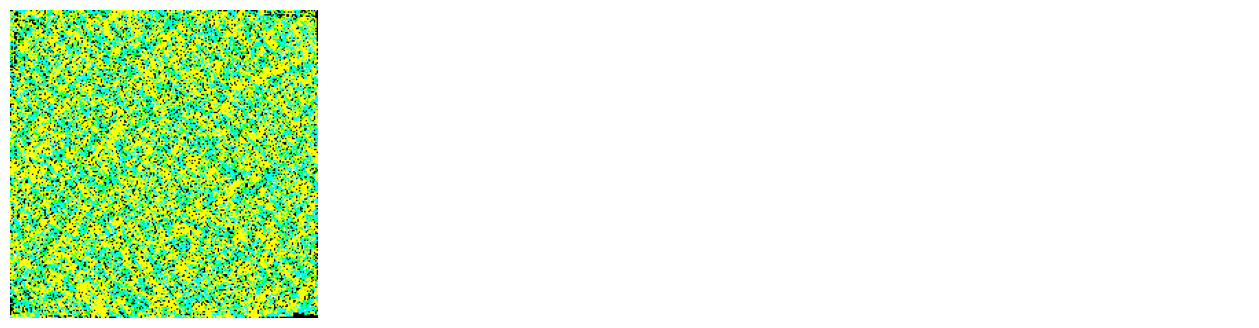

In [36]:
obj = objectives.LinearlyCombinedChannels(loaded_model, 'block1_conv2',[4,15,54,60,24,3,25,2,42,7],[6.43,6.32,4.63,4.50,3.83,3.54,2.99,2.78,2.69,2.32])
print(obj)
_ = render.render_vis(obj, 224,steps=(500,),freq_decay=0.2)

# Channel 4: Activation value 6.4310078620910645
# Channel 15: Activation value 6.3246235847473145
# Channel 54: Activation value 4.633859157562256
# Channel 60: Activation value 4.504968166351318
# Channel 24: Activation value 3.836761474609375
# Channel 3: Activation value 3.5423455238342285
# Channel 25: Activation value 2.9928882122039795
# Channel 2: Activation value 2.7831268310546875
# Channel 42: Activation value 2.6874310970306396
# Channel 7: Activation value 2.3187155723571777

Step 200


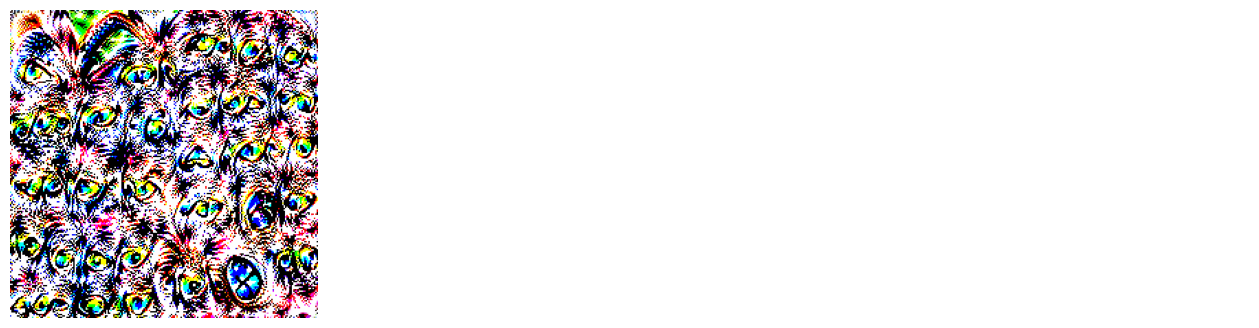

In [17]:
obj = objectives.Channel(loaded_model, 'block5_conv3',104)
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

In [49]:
import random


class_names = ['butterfly','cat', 'chicken','cow','dog','elephant','horse','sheep','spider','squirrel']

def get_10_images_for_path(class_name):
    image_paths = []
    
    # Read the file and extract image paths that contain the class_name
    with open('Examples67.txt', 'r') as file:
        lines = file.readlines()
        for line in lines:
            if class_name in line:
                image_paths.append(line.strip())  # Remove newline characters
    
    # Select 10 image paths if available
    paths=[]
    classes=[]
    for i in image_paths:
        path,class_name = i.split(", ")
        paths.append(path)
        classes.append(class_name)
    samples=[]
    for i in class_names:
        right_paths=[]
        indices=[classes.index(i) for j in classes if j == i]
        for j in indices:
            right_paths.append([paths[j],classes[j]])
        samples.append(random.sample(right_paths,1))
    
    return samples
    

In [66]:
get_10_images_for_path('butterfly')

[[['animals10\\raw-img\\butterfly\\e030b20929e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg',
   'butterfly']],
 [['animals10\\raw-img\\butterfly\\ea37b0082bf0093ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg',
   'cat']],
 [['animals10\\raw-img\\butterfly\\OIP-0FgiBZnYBh-PeACWWMXTlQHaJ4.jpeg',
   'chicken']],
 [['animals10\\raw-img\\butterfly\\OIP-gv56o1oRILuQYd9rL2Z_QwAAAA.jpeg',
   'cow']],
 [['animals10\\raw-img\\butterfly\\OIP-4M7ZOUZQLa1cRCdh6Q0VcgHaHZ.jpeg',
   'dog']],
 [['animals10\\raw-img\\butterfly\\ea36b50c2af0013ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg',
   'elephant']],
 [['animals10\\raw-img\\butterfly\\OIP-1nmm5E6U5MFMzqQRzuAwhAHaFE.jpeg',
   'horse']],
 [['animals10\\raw-img\\butterfly\\OIP--RuA1gbd_7OnfNia4Ao5aQAAAA.jpeg',
   'sheep']],
 [['animals10\\raw-img\\butterfly\\e030b20928e90021d85a5854ee454296eb70e3c818b413449df6c87ca3ed_640.jpg',
   'spider']],
 [['animals10\\raw-img\\butterfly\\OIP-1GLDT_vfdLFEcWBzWaxt7gAAAA.jpeg',


In [58]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
# Load the trained CNN model
model = keras.models.load_model('VGG19_transfer_learning_animals10.h5')

def calculate_max_10_channel_activation(layer_name, image_path):
    
    # Get the intermediate layer output
    intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    # Load and preprocess your input image
    # Load your input image and preprocess it if necessary
    image = Image.open(image_path)
    image = image.resize((224, 224))
    if image.mode == 'RGBA':
        image = image.convert('RGB')
    plt.imshow(image)
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Normalize the pixel values
    image_array = image_array / 255.0

    # Expand dimensions to match the model input shape
    input_image = np.expand_dims(image_array, axis=0)
    # Generate predictions and get activations of the intermediate layer
    activations = intermediate_layer_model.predict(input_image)

    # Analyze the activations
    channel_activations = tf.reduce_mean(activations, axis=(0, 1, 2))  # Compute the mean activation value for each channel

    # Determine the channels with highest activations
    top_channels_indices = tf.argsort(channel_activations, direction='DESCENDING')
    top_channels_indices = top_channels_indices.numpy()  # Convert to a NumPy array
    top_channels_activations = tf.gather(channel_activations, top_channels_indices)

    # Print the top 10 channels with their corresponding activations
    for i in range(10):
        channel_index = top_channels_indices[i]
        activation_value = top_channels_activations[i]
        print(f"Channel {channel_index}: Activation value {activation_value}")
    return (top_channels_indices, top_channels_activations)


1/1 [==============================] - 6s 6s/step
Channel 344: Activation value 8.327505111694336
Channel 298: Activation value 7.372802734375
Channel 57: Activation value 7.366809368133545
Channel 258: Activation value 7.221957683563232
Channel 37: Activation value 6.960235118865967
Channel 342: Activation value 5.603825092315674
Channel 315: Activation value 4.975077152252197
Channel 444: Activation value 4.844928741455078
Channel 52: Activation value 4.480800628662109
Channel 390: Activation value 4.29744815826416
1/1 [==============================] - 6s 6s/step
Channel 407: Activation value 12.405318260192871
Channel 158: Activation value 11.283392906188965
Channel 354: Activation value 10.842534065246582
Channel 488: Activation value 10.172608375549316
Channel 276: Activation value 8.941965103149414
Channel 57: Activation value 7.098319053649902
Channel 207: Activation value 6.84983491897583
Channel 258: Activation value 6.828851222991943
Channel 436: Activation value 6.445355892

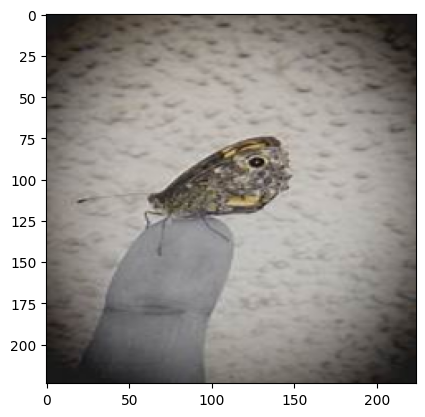

In [67]:
channels=[]
activations=[]
for i in range(len(sample_images)):
    channel, activation = calculate_max_10_channel_activation('block5_conv4', sample_images[i][0][0])
    channels.append(channel)
    activations.append(activation)

Step 800


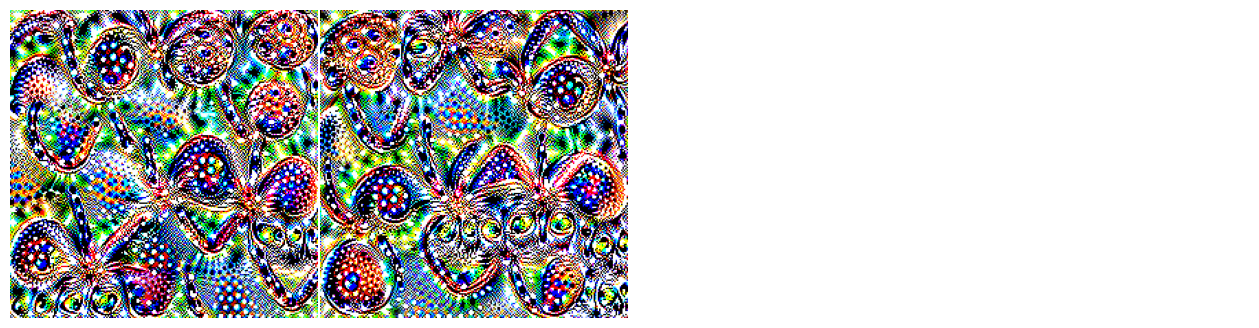

In [39]:

obj = objectives.LinearlyCombinedChannels(loaded_model, 'block5_conv3',[104,112,416,46,12,29,509,250,505,350],weights=[1.06,0.95,0.94,0.89,0.87,0.86,0.80,0.78,0.77,0.74]) #Make the weight the activation of the channel for an instance prediction.
print(obj)
transforms = [transformations.pad(12), 
              transformations.random_crop(8), 
              transformations.random_scale(0.9, 1.1), 
              transformations.random_rotate(10, p=0.8), 
              transformations.random_crop(4)]
_ = render.render_vis(obj, 224,batch=2,steps=(800,),freq_decay=0.2,transforms=transforms)



# Channel 104: Activation value 1.062514066696167
# Channel 112: Activation value 0.9495435953140259
# Channel 416: Activation value 0.9389473795890808
# Channel 46: Activation value 0.8930264115333557
# Channel 12: Activation value 0.865489661693573
# Channel 29: Activation value 0.8646934628486633
# Channel 509: Activation value 0.8025603890419006
# Channel 250: Activation value 0.7776637077331543
# Channel 505: Activation value 0.768652617931366
# Channel 350: Activation value 0.7409749031066895

Step 200


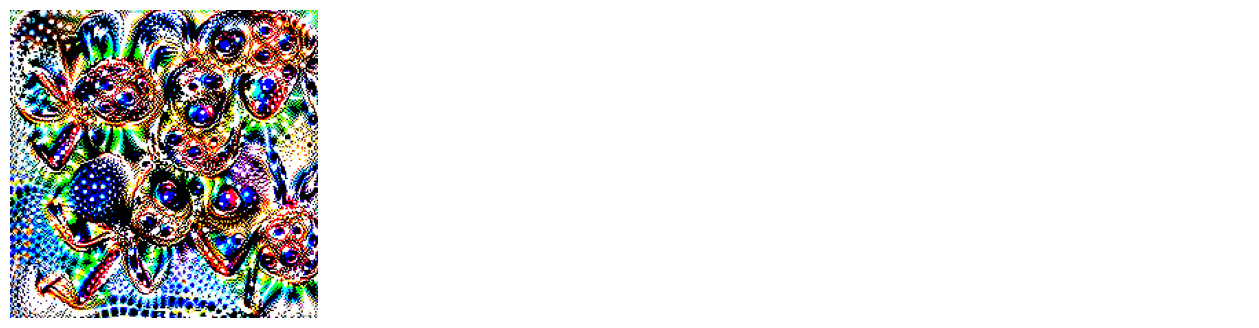

In [26]:
obj = objectives.LinearlyCombinedChannels(loaded_model, 'block5_conv4',[315,444,362,163,20,390,155,34,494,326],weights=[7.8,3.6,3.45,2.94,2.87,2.67,2.66,2.40,2.40,2.34]) #Make the weight the activation of the channel for an instance prediction.
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

# Channel 315: Activation value 7.799983024597168
# Channel 444: Activation value 3.6495492458343506
# Channel 362: Activation value 3.450355052947998
# Channel 163: Activation value 2.9471375942230225
# Channel 20: Activation value 2.879133462905884
# Channel 390: Activation value 2.675943374633789
# Channel 155: Activation value 2.6672067642211914
# Channel 34: Activation value 2.4090945720672607
# Channel 494: Activation value 2.4032368659973145
# Channel 326: Activation value 2.3415184020996094